# SetUP

In [13]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/stripes/res/allhumanBrain_1k_PFC_V1/")

In [14]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(edgeR)
library(RColorBrewer)
library(GenomicRanges)
library(ComplexHeatmap)
library(HiTC)
#library(Signac)
#library(rtracklayer)
#library(igraph)
})

# Function

In [15]:
AggregateMat <- function(loops,mat,...){
    lapply(1:dim(loops)[1],function(i){
        chrom=paste0(loops[i,1],loops[i,1])
        matID=which(names(mat)==chrom)
        id=loops[i,7]
        L=loops[i,8]
        R=loops[i,9]
        x=which(colnames(mat[[matID]])==L)
        y=which(colnames(mat[[matID]])==R)
        if(x-5>0&y-5>0&y+5<=dim(mat[[matID]])[1]&x+5<=dim(mat[[matID]])[1]){
        center <- mat[[matID]][(x-1):(x+1),(y-1):(y+1)]
        BL <- mat[[matID]][(x-5):(x-1),(y-5):(y-1)]
        BL[1,5] <-0
        ST<- mat[[matID]][(x-1):(x+1),(y+2):(y+5)]
        SB<- mat[[matID]][(x-1):(x+1),(y-5):(y-2)]
        SL<- mat[[matID]][(x-5):(x-2),(y-1):(y+1)]
        SR<- mat[[matID]][(x+2):(x+5),(y-1):(y+1)]
        #print(id)
        #print(sum(center))
        #print(sum(BL))
        #print(sum(center)/sum(BL))
        res <- data.frame(ID=id,
                          Center=sum(center)/9,
                          BL=sum(BL)/24,
                          ST=sum(ST)/12,
                          SB=sum(SB)/12,
                          SL=sum(SL)/12,
                          SR=sum(SR)/12
                          )}else{
        center <- mat[[matID]][(x-1):(x+1),(y-1):(y+1)]
        res <- data.frame(ID=id,
                          Center=sum(center)/9,
                          BL=NA,
                          ST=NA,
                          SB=NA,
                          SL=NA,
                          SR=NA)}  
        return(res)})
}

In [16]:
makeAPA <- function(loops,mat,...){
    lapply(1:dim(loops)[1],function(i){
        chrom=paste0(loops[i,1],loops[i,1])
        matID=which(names(mat)==chrom)
        id=loops[i,7]
        L=loops[i,8]
        R=loops[i,9]
        x=which(colnames(mat[[matID]])==L)
        y=which(colnames(mat[[matID]])==R)
        if(x-5>0&y-5>0&y+5<=dim(mat[[matID]])[1]&x+5<=dim(mat[[matID]])[1]){
          res <- mat[[matID]][(x-5):(x+5),(y-5):(y+5)]  
        }else(res <- matrix(0,11,11))  
        return(res)})
    
}

# Load Data

In [30]:
dat <- read.table("./human_1K-PFC_V1_merge.RG.iPC.eN.iN.stripes.PFC.RG.counts.sta") %>% filter(V3-V2==50000 | V6-V5==50000) 

In [575]:
eNrawMAT <- readRDS("../../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_eN.50.raw.mat.RDS")
RGrawMAT <- readRDS("../../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_RG.50.raw.mat.RDS")

In [17]:
CP.oe <- readRDS("../../../../cleanData/oeMAT/human_pubHiC-fromyt/CP.50.oe.mat.RDS")
GZ.oe <- readRDS("../../../../cleanData/oeMAT/human_pubHiC-fromyt/GZ.50.oe.mat.RDS")

In [18]:
idx <- read.table("../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")

In [578]:
eNrawMAT.hitc <- dplyr::inner_join(eNrawMAT,idx,by=c("seqnames"="V1","V1"="V2")) %>% 
dplyr::inner_join(.,idx,by=c("seqnames"="V1","V2"="V2")) %>% select(V4.x,V4.y,V3.x)
RGrawMAT.hitc <- dplyr::inner_join(RGrawMAT,idx,by=c("seqnames"="V1","V1"="V2")) %>% 
dplyr::inner_join(.,idx,by=c("seqnames"="V1","V2"="V2")) %>% select(V4.x,V4.y,V3.x)

In [24]:
CP.oe.hitc <- dplyr::inner_join(CP.oe,idx,by=c("seqnames"="V1","V1"="V2")) %>% 
dplyr::inner_join(.,idx,by=c("seqnames"="V1","V2"="V2")) %>% select(V4.x,V4.y,V3.x) %>% filter(!is.na(V3.x))
GZ.oe.hitc <- dplyr::inner_join(GZ.oe,idx,by=c("seqnames"="V1","V1"="V2")) %>% 
dplyr::inner_join(.,idx,by=c("seqnames"="V1","V2"="V2")) %>% select(V4.x,V4.y,V3.x) %>% filter(!is.na(V3.x))

In [580]:
write.table(eNrawMAT.hitc,"../../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_eN.50.raw.hicpro.mat",
           ,col.names = F,row.names = F,sep="\t",quote=F)
write.table(RGrawMAT.hitc,"../../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_RG.50.raw.hicpro.mat",
           ,col.names = F,row.names = F,sep="\t",quote=F)

In [26]:
write.table(CP.oe.hitc,"../../../../cleanData/oeMAT/human_pubHiC-fromyt/CP.50.oe.mat.hicpro.mat",
           ,col.names = F,row.names = F,sep="\t",quote=F)
write.table(GZ.oe.hitc,"../../../../cleanData/oeMAT/human_pubHiC-fromyt/GZ.50.oe.mat.hicpro.mat",
           ,col.names = F,row.names = F,sep="\t",quote=F)

In [6]:
RGoe <- importC(con="../../../../cleanData/oeMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_RG.50.oe.hicpro.mat",rm.trans = T,
        xgi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed",
        ygi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")
eNoe <- importC(con="../../../../cleanData/oeMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_eN.50.oe.hicpro.mat",rm.trans = T,
        xgi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed",
        ygi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)



In [28]:
CPoe <- importC(con="../../../../cleanData/oeMAT/human_pubHiC-fromyt/CP.50.oe.mat.hicpro.mat",rm.trans = T,
        xgi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed",
        ygi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")
GZoe <- importC(con="../../../../cleanData/oeMAT/human_pubHiC-fromyt/GZ.50.oe.mat.hicpro.mat",rm.trans = T,
        xgi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed",
        ygi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)



In [7]:
RGraw <- importC(con="../../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_RG.50.raw.hicpro.mat",rm.trans = T,
        xgi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed",
        ygi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")
eNraw <- importC(con="../../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_eN.50.raw.hicpro.mat",rm.trans = T,
        xgi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed",
        ygi.bed = "../../../../../../Annotation/genomeBin/eN.all.allValidPairs.hic.50kb.idx.bed")

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)

Loading Genomic intervals ...

Reading file ...

Convert 'C' file in HTCexp object(s)



In [8]:
RGoe.matrix <- lapply(RGoe, function(idx){
  as.matrix(intdata(idx))  
})
eNoe.matrix <- lapply(eNoe, function(idx){
  as.matrix(intdata(idx))  
})

In [9]:
RGraw.matrix <- lapply(RGraw, function(idx){
  mat <- as.matrix(intdata(idx)) 
  mat <- mat/sum(mat)*10000000
  return(mat)
})
eNraw.matrix <- lapply(eNraw, function(idx){
   mat <- as.matrix(intdata(idx)) 
   mat <- mat/sum(mat)*10000000 
   return(mat) 
})

In [29]:
CPoe.matrix <- lapply(CPoe, function(idx){
  as.matrix(intdata(idx))  
})
GZoe.matrix <- lapply(GZoe, function(idx){
  as.matrix(intdata(idx))  
})

# Loops prepare

In [31]:
L <- dat %>% 
filter(V3-V2==50000) %>% 
group_by(V1,V2,V3) %>% summarise(s=max(V6)) %>% as.data.frame() %>% select(V1,V2,s) %>% 
set_names(c("seqnames","start","end")) %>% mutate(type="L",start=start+1) %>% distinct()

`summarise()` has grouped output by 'V1', 'V2'. You can override using the `.groups` argument.


In [32]:
R <- dat %>% filter(V6-V5 ==50000) %>%
group_by(V4,V5,V6) %>% summarise(s=min(V2)) %>% as.data.frame() %>% select(V4,s,V6) %>% 
set_names(c("seqnames","start","end"))%>% mutate(type="R",start=start+1)%>% distinct()

`summarise()` has grouped output by 'V4', 'V5'. You can override using the `.groups` argument.


In [33]:
LA <- dat %>% 
filter(V3-V2==50000)%>% select(V1,V2,V3) %>% set_names(c("Seqnames","Start","End")) %>% mutate(Type="LA",Start=Start+1)

In [34]:
RA <- dat %>% 
filter(V6-V5==50000)%>% select(V4,V5,V6) %>% set_names(c("Seqnames","Start","End")) %>% mutate(Type="RA",Start=Start+1)

In [35]:
L.gr <- makeGRangesFromDataFrame(L)
R.gr <- makeGRangesFromDataFrame(R)
LA.gr <- makeGRangesFromDataFrame(LA)
RA.gr <- makeGRangesFromDataFrame(RA)

In [36]:
L.loops.candidate <- cbind(L[queryHits(findOverlaps(L.gr,RA.gr)),],
RA[subjectHits(findOverlaps(L.gr,RA.gr)),]) %>% filter(Start > start) %>% mutate(end=start+50000-1) %>% select(seqnames,start,end,Seqnames,Start,End) %>% distinct()

In [37]:
R.loops.candidate <-cbind(R[queryHits(findOverlaps(R.gr,LA.gr)),],
LA[subjectHits(findOverlaps(R.gr,LA.gr)),]) %>% filter(End < end) %>% mutate(start=end-50000+1) %>% select(Seqnames,Start,End,seqnames,start,end) %>% distinct() %>%
set_names(c("seqnames","start","end","Seqnames","Start","End"))

In [38]:
all.ELRL.candidate <- rbind(L.loops.candidate,R.loops.candidate) %>% distinct() %>% mutate(start=start-1,Start=Start-1) %>% filter(End-end >= 300000) %>% mutate(ID=1:14580) %>%
dplyr::left_join(.,idx,by=c("seqnames"="V1","start"="V2")) %>% dplyr::left_join(.,idx,by=c("Seqnames"="V1","Start"="V2")) %>%
select(-c(V3.x,V3.y)) %>% filter(seqnames != "chrX")

# call loops

In [ ]:
RGloops.all <- AggregateMat(all.ELRL.candidate,RGraw.matrix)
RGloops.all.dat <- do.call(rbind,RGloops.all)
RG.sig.ID <- RGloops.all.dat %>% filter(!is.na(ST)) %>% filter(Center >=quantile(RGloops.all.dat$Center,.3),Center/BL >=1.5,Center/ST>=1.2,Center/SB>=1.2,Center/SL>=1.2,Center/SR>=1.2) %>% .$ID

In [ ]:
eNloops.all <- AggregateMat(all.ELRL.candidate,eNraw.matrix)
eNloops.all.dat <- do.call(rbind,eNloops.all)
eN.sig.ID <-eNloops.all.dat %>% filter(!is.na(ST)) %>% filter(Center >=quantile(eNloops.all.dat$Center,.3),Center/BL >=1.5,Center/ST>=1.2,Center/SB>=1.2,Center/SL>=1.2,Center/SR>=1.2) %>% .$ID

In [ ]:
RG.sig.loops <- all.ELRL.candidate %>% filter(ID %in% RG.sig.ID) %>% 
mutate(group=case_when(End-end>=2000000 ~ "long",
                       End-end<2000000 ~ "short"))
eN.sig.loops <- all.ELRL.candidate %>% filter(ID %in% eN.sig.ID) %>% 
mutate(group=case_when(End-end>=2000000 ~ "long",
                       End-end<2000000 ~ "short"))

In [ ]:
RG.specific <- dplyr::anti_join(RG.sig.loops[,1:9],eN.sig.loops[,1:9],by="ID") %>% 
dplyr::inner_join(.,RGloops.all.dat,by="ID") %>% 
dplyr::inner_join(.,eNloops.all.dat,by="ID") %>%
filter(Center.y / Center.x < 0.8) %>% mutate(type="RG")

In [ ]:
eN.specific <- dplyr::anti_join(eN.sig.loops[,1:9],RG.sig.loops[,1:9],by="ID") %>% 
dplyr::inner_join(.,eNloops.all.dat,by="ID") %>% 
dplyr::inner_join(.,RGloops.all.dat,by="ID") %>%
filter(Center.y / Center.x < 0.8) %>% mutate(type="eN")

In [ ]:
both <- dplyr::inner_join(eN.sig.loops[,1:7],RG.sig.loops[,7:9],by="ID") %>% 
dplyr::inner_join(.,eNloops.all.dat,by="ID") %>% 
dplyr::inner_join(.,RGloops.all.dat,by="ID") %>% mutate(type="both")

In [39]:
RG.specific <- read.table("./all.humanBrain.eNtoRG.PFCV1.1k.stripes_50_S+L.allLoops.RGspecific.bedpe")
eN.specific <- read.table("./all.humanBrain.eNtoRG.PFCV1.1k.stripes_50_S+L.allLoops.eNspecific.bedpe")
both <- read.table("./all.humanBrain.eNtoRG.PFCV1.1k.stripes_50_S+L.allLoops.RGeNBoth.bedpe")

In [ ]:
all.loops <- rbind(RG.specific,eN.specific,both) %>% mutate(distance=End-end)

# plot APA

## SCOPEC

In [ ]:
RG.specific.RG <- makeAPA(RG.specific,RGoe.matrix)
RG.specific.RG.DF <- matrix(0,11,11)
for (i in 1:length(RG.specific.RG)){
     RG.specific.RG.DF <- RG.specific.RG.DF + RG.specific.RG[[i]]
    }
t <- lapply(RG.specific.RG,sum)
L <- t[which(t!=0)] %>% length()
RG.specific.RG.DF <- RG.specific.RG.DF/L

RG.specific.eN <- makeAPA(RG.specific,eNoe.matrix)
RG.specific.eN.DF <- matrix(0,11,11)
for (i in 1:length(RG.specific.eN)){
     RG.specific.eN.DF <- RG.specific.eN.DF + RG.specific.eN[[i]]
    }
t <- lapply(RG.specific.eN,sum)
L <- t[which(t!=0)] %>% length()
RG.specific.eN.DF <- RG.specific.eN.DF/L

In [656]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_eRGspecLoops.RG.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(RG.specific.RG.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_eRGspecLoops.eN.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(RG.specific.eN.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [657]:
eN.specific.RG <- makeAPA(eN.specific,RGoe.matrix)
eN.specific.RG.DF <- matrix(0,11,11)
for (i in 1:length(eN.specific.RG)){
     eN.specific.RG.DF <- eN.specific.RG.DF + eN.specific.RG[[i]]
    }
t <- lapply(eN.specific.RG,sum)
L <- t[which(t!=0)] %>% length()
eN.specific.RG.DF <- eN.specific.RG.DF/L

eN.specific.eN <- makeAPA(eN.specific,eNoe.matrix)
eN.specific.eN.DF <- matrix(0,11,11)
for (i in 1:length(eN.specific.eN)){
     eN.specific.eN.DF <- eN.specific.eN.DF + eN.specific.eN[[i]]
    }
t <- lapply(eN.specific.eN,sum)
L <- t[which(t!=0)] %>% length()
eN.specific.eN.DF <- eN.specific.eN.DF/L

In [660]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_eNspecLoops.RG.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(eN.specific.RG.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_eNspecLoops.eN.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(eN.specific.eN.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [661]:
both.RG <- makeAPA(both,RGoe.matrix)
both.RG.DF <- matrix(0,11,11)
for (i in 1:length(both.RG)){
     both.RG.DF <- both.RG.DF + both.RG[[i]]
    }
t <- lapply(both.RG,sum)
L <- t[which(t!=0)] %>% length()
both.RG.DF <- both.RG.DF/L

both.eN <- makeAPA(both,eNoe.matrix)
both.eN.DF <- matrix(0,11,11)
for (i in 1:length(both.eN)){
     both.eN.DF <- both.eN.DF + both.eN[[i]]
    }
t <- lapply(both.eN,sum)
L <- t[which(t!=0)] %>% length()
both.eN.DF <- both.eN.DF/L

In [664]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_bothLoops.RG.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(both.RG.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_bothLoops.eN.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(both.eN.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

## HiC

In [40]:
RG.specific.CP <- makeAPA(RG.specific,CPoe.matrix)
RG.specific.CP.DF <- matrix(0,11,11)
for (i in 1:length(RG.specific.CP)){
     RG.specific.CP.DF <- RG.specific.CP.DF + RG.specific.CP[[i]]
    }
t <- lapply(RG.specific.CP,sum)
L <- t[which(t!=0)] %>% length()
RG.specific.CP.DF <- RG.specific.CP.DF/L

RG.specific.GZ <- makeAPA(RG.specific,GZoe.matrix)
RG.specific.GZ.DF <- matrix(0,11,11)
for (i in 1:length(RG.specific.GZ)){
     RG.specific.GZ.DF <- RG.specific.GZ.DF + RG.specific.GZ[[i]]
    }
t <- lapply(RG.specific.GZ,sum)
L <- t[which(t!=0)] %>% length()
RG.specific.GZ.DF <- RG.specific.GZ.DF/L

In [48]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_RGspecLoops.GZ.signal.oeAPA.50kb.legend1-3.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(RG.specific.GZ.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,3),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_RGspecLoops.CP.signal.oeAPA.50kb.legend1-3.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(RG.specific.CP.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,3),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [49]:
eN.specific.CP <- makeAPA(eN.specific,CPoe.matrix)
eN.specific.CP.DF <- matrix(0,11,11)
for (i in 1:length(eN.specific.CP)){
     eN.specific.CP.DF <- eN.specific.CP.DF + eN.specific.CP[[i]]
    }
t <- lapply(eN.specific.CP,sum)
L <- t[which(t!=0)] %>% length()
eN.specific.CP.DF <- eN.specific.CP.DF/L

eN.specific.GZ <- makeAPA(eN.specific,GZoe.matrix)
eN.specific.GZ.DF <- matrix(0,11,11)
for (i in 1:length(eN.specific.GZ)){
     eN.specific.GZ.DF <- eN.specific.GZ.DF + eN.specific.GZ[[i]]
    }
t <- lapply(eN.specific.GZ,sum)
L <- t[which(t!=0)] %>% length()
eN.specific.GZ.DF <- eN.specific.GZ.DF/L

In [58]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_eNspecLoops.GZ.signal.oeAPA.50kb.legend1-4.5.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(eN.specific.GZ.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4.6),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_eNspecLoops.CP.signal.oeAPA.50kb.legend1-4.5.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(eN.specific.CP.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4.3),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [60]:
both.CP <- makeAPA(both,CPoe.matrix)
both.CP.DF <- matrix(0,11,11)
for (i in 1:length(both.CP)){
     both.CP.DF <- both.CP.DF + both.CP[[i]]
    }
t <- lapply(both.CP,sum)
L <- t[which(t!=0)] %>% length()
both.CP.DF <- both.CP.DF/L

both.GZ <- makeAPA(both,GZoe.matrix)
both.GZ.DF <- matrix(0,11,11)
for (i in 1:length(both.GZ)){
     both.GZ.DF <- both.GZ.DF + both.GZ[[i]]
    }
t <- lapply(both.GZ,sum)
L <- t[which(t!=0)] %>% length()
both.GZ.DF <- both.GZ.DF/L

In [63]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_bothLoops.GZ.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(both.GZ.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()
pdf("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_bothLoops.CP.signal.oeAPA.50kb.legend1-4.pdf",width=2,height=2)
ComplexHeatmap::pheatmap(both.CP.DF,fontsize = 8,show_colnames = F,show_rownames = F,legend = F,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("royalblue","white","red"))(500),
                         breaks=c(1,4),
                         cluster_cols = F,cluster_rows = F,border = NA)
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

## sta loop length

In [665]:
library(ggsci)

In [667]:
all.loops %>% group_by(type) %>% summarise(median=median(distance),log=log10(median+1))

type,median,log
<chr>,<dbl>,<dbl>
both,1050000,6.021190
eN,1850000,6.267172
RG,850000,5.929419


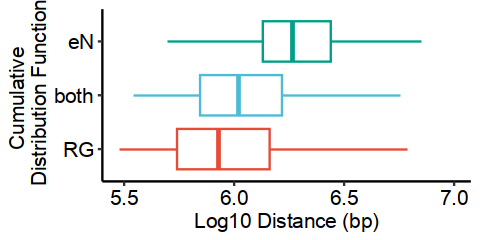

In [671]:
options(repr.plot.width=4,repr.plot.height=2)
ggplot(all.loops %>% mutate(type=factor(all.loops$type,levels=c("RG","both","eN")))) + 
  geom_boxplot(aes(y = type, x = log((distance+1),10), color = type),outlier.size = 0,outlier.color = NA)+
  scale_color_npg()+
  #scale_x_continuous(limits = c(5,7.2))+
  #scale_y_continuous(limits = c(0.01,1))+
  labs(x="Log10 Distance (bp)", y="Cumulative \n Distribution Function")+
  theme_classic()+
theme(axis.text.x = element_text(color="black", size=12),
      axis.title.y = element_text(color="black", size=12),
      axis.title.x = element_text(color="black", size=12),
      legend.title = element_text(color="black", size=12),
      legend.text = element_text(color="black", size=12),
      axis.text.y = element_text(color="black", size=12),legend.position="none"
      )
ggsave("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_loops.boxplot.pdf",height = 2,width=3.5)

In [1]:
options(repr.plot.width=4.2,repr.plot.height=2)
ggplot(all.loops %>% mutate(type=factor(all.loops$type,levels=c("RG","both","eN"))),
       aes(log((distance+1),10))) + 
  stat_ecdf(aes(colour = type),geom = "line",size=0.75)+
  scale_color_npg()+
  scale_x_continuous(limits = c(5,7.2))+
  #scale_y_continuous(limits = c(0.01,1))+
  labs(x="Log10 Distance (bp)", y="Cumulative \n Distribution Function")+
  theme_classic()+
theme(axis.text.x = element_text(color="black", size=12),
      axis.title.y = element_text(color="black", size=12),
      axis.title.x = element_text(color="black", size=12),
      legend.title = element_text(color="black", size=12),
      legend.text = element_text(color="black", size=12),
      axis.text.y = element_text(color="black", size=12),
      )
#ggsave("../../../../FINAL_figures/fig2/humanBrain_1k_PFCV1_loops.CDF.pdf",height = 2,width=4.5)

ERROR: Error in ggplot(all.loops %>% mutate(type = factor(all.loops$type, levels = c("RG", : 没有"ggplot"这个函数


In [675]:
write.table(RG.specific %>% mutate(start=as.integer(start),end=as.integer(end),Start=as.integer(Start),End=as.integer(End)),
            "./all.humanBrain.eNtoRG.PFCV1.1k.stripes_50_S+L.allLoops.RGspecific.bedpe",col.names = F,row.names = F,sep="\t",quote=F)
write.table(eN.specific %>% mutate(start=as.integer(start),end=as.integer(end),Start=as.integer(Start),End=as.integer(End)),
            "./all.humanBrain.eNtoRG.PFCV1.1k.stripes_50_S+L.allLoops.eNspecific.bedpe",col.names = F,row.names = F,sep="\t",quote=F)
write.table(both %>% mutate(start=as.integer(start),end=as.integer(end),Start=as.integer(Start),End=as.integer(End)),
            "./all.humanBrain.eNtoRG.PFCV1.1k.stripes_50_S+L.allLoops.RGeNBoth.bedpe",col.names = F,row.names = F,sep="\t",quote=F)

In [ ]:
RG.specific